# Downloading Google's Earth Engine Images

This notebook shows how to download Earth Engine images.

### Configure the Environment

In [10]:
from urllib.request import urlopen
import zipfile
import rasterio
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display
import numpy as np
import ee

Initialize the Earth Engine client.

In [20]:
ee.Initialize()

Select image 

In [21]:
bbox = (-3.6, 37.1, -3.5, 37.2) # bounding box
scale = 10 # scale in meters 
image_name = 'COPERNICUS/S2/20150828T110656_20160412T015159_T30SVG'  #This is the name of the image resource in the E.E. catalouge
bands = ['B4', 'B3', 'B2']    # Those are the bands of the image we wish to access

**Inspect the data**

In [22]:
def show_image(image):
      display.display(display.Image(ee.data.getThumbnail({
      'image': image.serialize(),
      'dimensions': '360',
  })))

In [23]:
image = ee.Image(image_name).clip(ee.Geometry.Rectangle(bbox))
#image = ee.Image(image_name)

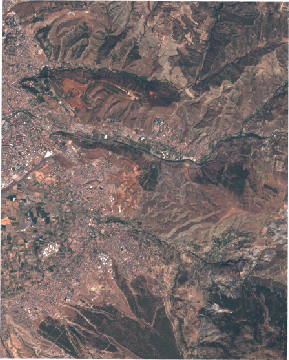

In [24]:
show_image(image.visualize(
    bands=bands,
    min=0,
    max=3000
))

**Download data**

If so desired, you could download only a region or geometrical subset of the Image. We demonstrate how to do this via the bbox setting above, and the region key in the dictionary below. Passing the an ee.Geometry object, such as a bounding box, as we show here, would cause the downloaded image to be within that location only.

In [298]:
def download_image(image, download_zip, vmin, vmax, scale, bands = None, bbox = None):
    
    if bands != None:
        image = image.select(bands)
        
    Vizparam = {'min': vmin, 'max': vmax, 'scale': scale, 'crs': 'EPSG:4326'}
    if bbox != None:
        Vizparam['region'] = ee.Geometry.Rectangle(bbox).toGeoJSONString()
    
   
    url = image.getDownloadUrl(Vizparam)     

    print('Downloading image...')
    print("url: ", url)
    data = urlopen(url)
    with open(download_zip, 'wb') as fp:
        while True:
            chunk = data.read(16 * 1024)
            if not chunk: break
            fp.write(chunk)
            
    # extract the zip file transformation data
    z = zipfile.ZipFile(download_zip, 'r')
    target_folder_name = download_zip.split('.zip')[0]
    z.extractall(target_folder_name)
    print('Download complete!')
def load_data(path):
    # Load tiff file data
    with rasterio.open('./data/20150828T110656_20160412T015159_T30SVG.B2.tif') as src:
        data = src.read()
    return data

In [295]:
image = ee.Image(image_name)

download_image(image, 'data.zip', vmin=0, vmax=3000, scale=scale, bands=bands, bbox = bbox)

url:  https://earthengine.googleapis.com/api/download?docid=b9b3e336283106eff026cb5ddc94625c&token=cb6a930157dcea0bc3d932976e68aaa8
Download complete!


In [296]:
# Load tiff file data
with rasterio.open('./data/20150828T110656_20160412T015159_T30SVG.B2.tif') as src:
    data = src.read()
    profile = src.profile
    transform = src.transform

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [341]:
image_B4 = load_data('./data/20150828T110656_20160412T015159_T30SVG.B4.tif')
image_B3 = load_data('./data/20150828T110656_20160412T015159_T30SVG.B3.tif')
image_B2 = load_data('./data/20150828T110656_20160412T015159_T30SVG.B2.tif')

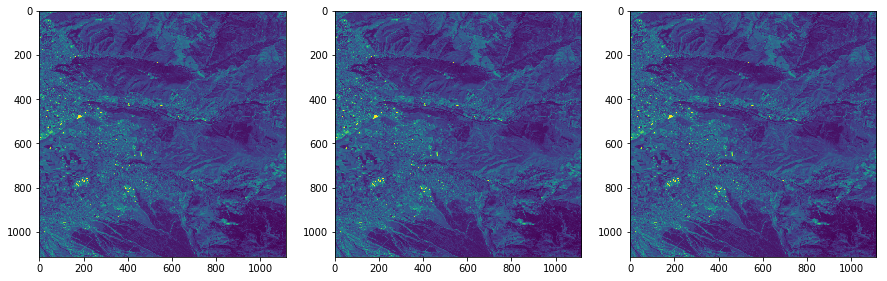

In [410]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax = axs[0]
ax.imshow(image_B4[0,:,:], vmax=3000);

ax = axs[1]
ax.imshow(image_B3[0,:,:], vmax=3000);

ax = axs[2]
ax.imshow(image_B2[0,:,:], vmax=3000);

### Image collection

In [280]:
dataset = ee.ImageCollection('COPERNICUS/S2').filterDate('2018-02-01', '2018-02-28').filterBounds(ee.Geometry.Rectangle(bbox)).filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

In [281]:
datasetList = dataset.toList(dataset.size())
datasetSize = datasetList.size().getInfo()
datasetSize

In [283]:
image = ee.Image(datasetList.get(1))

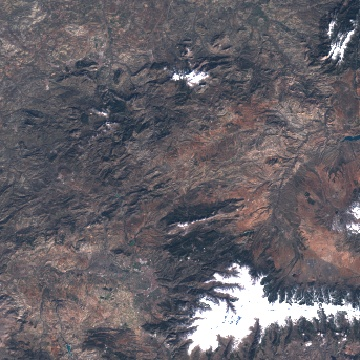

In [284]:
show_image(image.visualize(
    bands=bands,
    min=0,
    max=3000
))